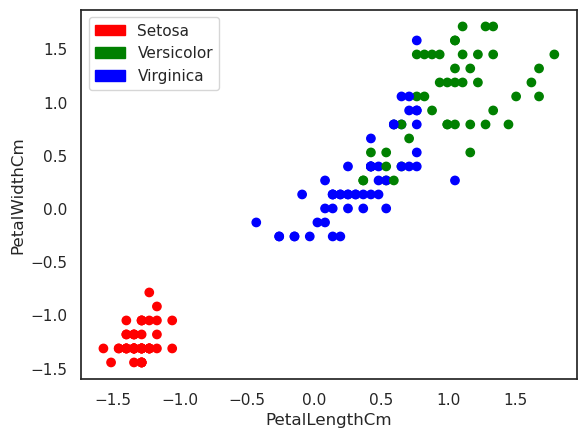

0.4589717867018717
0.6201351808870379


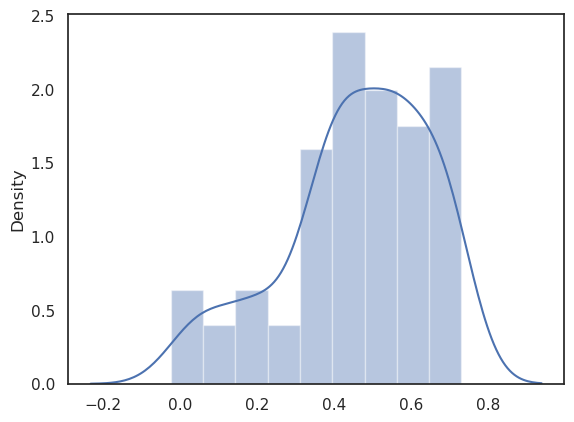

In [3]:
# import some libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
# show plots inline
%matplotlib inline

data = pd.read_csv('./lab_files/Lab_04/Iris.csv')
data = data.drop('Id', axis=1) # get rid of the Id column - don't need it
data.sample(5)

X = data.iloc[:,0:4]
y = data.iloc[:,-1]

from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(X)
X_scaled_array = scaler.transform(X)
X_scaled = pd.DataFrame(X_scaled_array, columns = X.columns)
X_scaled.sample(5)

from sklearn.cluster import KMeans
nclusters = 3 # this is the k in kmeans
seed = 0
km = KMeans(n_clusters=nclusters, random_state=seed)
km.fit(X_scaled)
# predict the cluster for each data point
y_cluster_kmeans = km.predict(X_scaled)
y_cluster_kmeans

import matplotlib.patches as mpatches
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
colors = np.array(['blue', 'red', 'green'])
plt.scatter(X_scaled.iloc[:, 2],X_scaled.iloc[:, 3],c=colors[y_cluster_kmeans])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_kmeans)
print(score)

scores = metrics.silhouette_samples(X_scaled, y_cluster_kmeans)
sns.distplot(scores)

from sklearn.metrics.cluster import adjusted_rand_score
score = adjusted_rand_score(y, y_cluster_kmeans) 
print(score)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


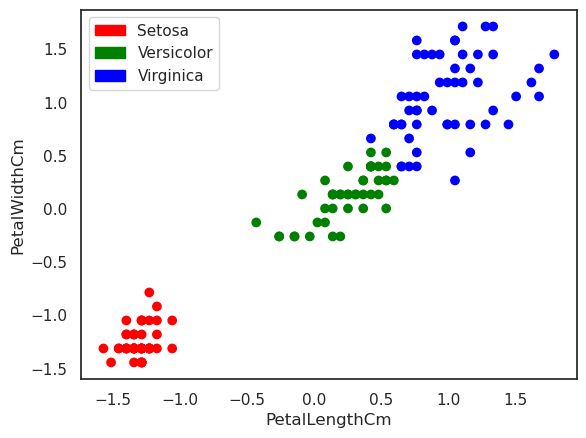

0.3727731874570307
0.9038742317748124


In [4]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=nclusters)
gmm.fit(X_scaled)
# predict the cluster for each data point
y_cluster_gmm = gmm.predict(X_scaled)
print(y_cluster_gmm)

red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')
colors = np.array(['blue', 'red', 'green'])
plt.scatter(X_scaled.iloc[:, 2],X_scaled.iloc[:, 3],c=colors[y_cluster_gmm])
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.legend(handles=[red_patch, green_patch, blue_patch])
plt.show()

from sklearn import metrics
score = metrics.silhouette_score(X_scaled, y_cluster_gmm)
print(score)

from sklearn.metrics.cluster import adjusted_rand_score
score = adjusted_rand_score(y, y_cluster_gmm)
print(score)

0.5528190123564095


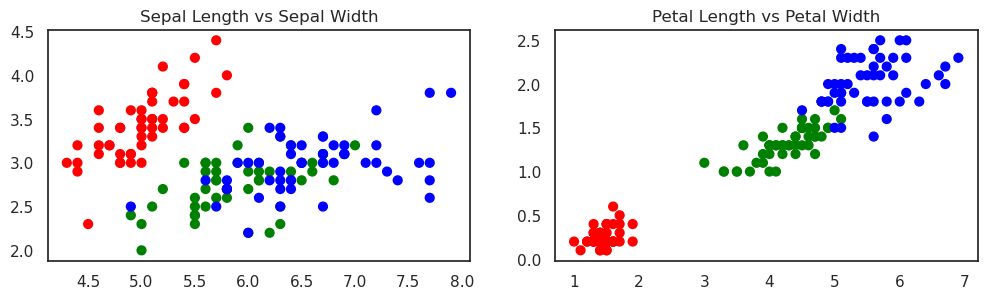

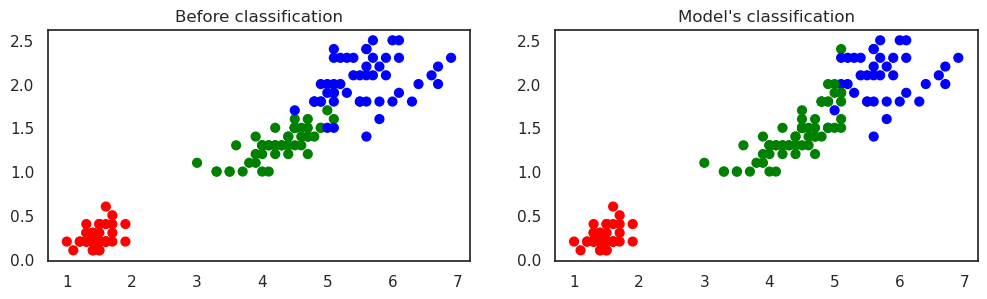

In [5]:
from sklearn import datasets
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

iris = datasets.load_iris()
# print(iris.data)
# print(iris.target)

x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

# Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))
# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']], s=40)
plt.title('Sepal Length vs Sepal Width')
plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']], s=40)
plt.title('Petal Length vs Petal Width')

# create a model object with 3 clusters

model = KMeans(n_clusters=3)
model.fit(x)

#Start with a plot figure of size 12 units wide & 3 units tall
plt.figure(figsize=(12,3))

# Create an array of three colours, one for each species.
colors = np.array(['red', 'green', 'blue'])

# The fudge to reorder the cluster ids.
predictedY = np.choose(model.labels_, [1, 0, 2]).astype(np.int64)


# Plot the classifications that we saw earlier between Petal Length and Petal Width
plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']], s=40)
plt.title('Before classification')
 
# Plot the classifications according to the model
plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predictedY], s=40)
plt.title("Model's classification")

from sklearn import metrics
score = metrics.silhouette_score(x, predictedY)
print(score)